# Is there a salary difference between number of positions played? 

## Import the required packages, data, and clean the data

In [35]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())

Data organization for this research question

In [36]:
Position_Analysis = Salary_Analysis.loc[:, ['salary', 'G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf', 'G_dh'] ]

# Function which tells the dataframe if the value is 0, then they never played that position
def Binary(s):
    if s == 0:
        return 0
    else: 
        return 1
    
# Apply to the whole dataframe
Binary_Position = Position_Analysis.applymap(Binary)  

#Add a column to count the positions
Binary_Position['NumPos'] = Binary_Position.sum(axis=1) - 1

#Bring back in the correct salary values
Binary_Position['salary'] = Position_Analysis['salary']/1000000

#Cleanup
Player_Position = Binary_Position.loc[:,['salary','NumPos']]

#Pivot for Analysis
Pivot = Binary_Position.pivot(columns='NumPos', values='salary')

## Manually examine the differences in the group

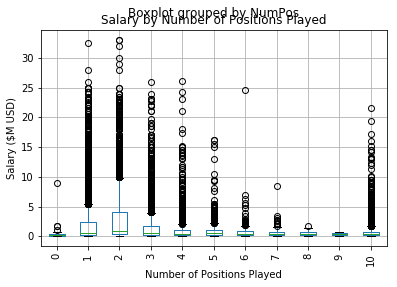

In [37]:
Player_Position.boxplot(by = 'NumPos', rot=90)
plt.title('Salary by Number of Positions Played')
plt.xlabel('Number of Positions Played')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

Set the significance value before any testing. 

In [38]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [39]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: 236054.507181
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.60606364293e-12
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 642.094832692
P-Value: 1.66867559906e-131

Reject NULL hypothesis - Significant differences exist between groups.
